In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("Chennai houseing sale.csv")
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [2]:
obj_features = df.select_dtypes(include="object").columns
for i in obj_features:
    print(f"Value counts for {i}:\n{df[i].value_counts()}\n")


Value counts for PRT_ID:
PRT_ID
P09794    1
P03210    1
P09411    1
P01812    1
P05346    1
         ..
P09623    1
P03377    1
P09679    1
P09105    1
P00219    1
Name: count, Length: 7109, dtype: int64

Value counts for AREA:
AREA
Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: count, dtype: int64

Value counts for DATE_SALE:
DATE_SALE
06-10-2009    12
26-02-2012    10
12-04-2011    10
06-01-2009    10
17-11-2010    10
              ..
28-12-2007     1
22-05-2012     1
11-10-2014     1
04-08-2013     1
06-09-2013     1
Name: count, Length: 2798, dtype: int64

Value counts for SALE_COND:
SALE_COND
AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land     

As you can see there are some spelling mistakes in column values. Though they are same things but due to differnt spelling it will be treated differently.

In [3]:
# Clean AREA column
df['AREA'] = df['AREA'].replace({
    'Chrompt': 'Chrompet',
    'Chrmpet': 'Chrompet',
    'Chormpet': 'Chrompet',
    'Karapakam': 'Karapakkam',
    'Ana Nagar': 'Anna Nagar',
    'Ann Nagar': 'Anna Nagar',
    'Velchery': 'Velachery',
    'Adyr': 'Adyar',
    'KKNagar': 'KK Nagar',
    'TNagar': 'T Nagar'
})


In [4]:
# Clean SALE_COND column
df['SALE_COND'] = df['SALE_COND'].replace({
    'Adj Land': 'AdjLand',
    'Ab Normal': 'AbNormal',
    'Partiall': 'Partial',
    'PartiaLl': 'Partial'
})

In [5]:
# Clean PARK_FACIL column
df['PARK_FACIL'] = df['PARK_FACIL'].replace({
    'Noo': 'No'
})

# Clean BUILDTYPE column
df['BUILDTYPE'] = df['BUILDTYPE'].replace({
    'Other': 'Others',
    'Comercial': 'Commercial'
})

# Clean UTILITY_AVAIL column
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].str.strip()
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].replace({
    'All Pub': 'AllPub',
    'NoSeWa' : 'NoSewer',
    'NoSewr' : 'NoSewer'
})


# Clean STREET column
df['STREET'] = df['STREET'].replace({
    'Pavd': 'Paved',
    'NoAccess': 'No Access'
})


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [7]:
df.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [9]:
# Handle missing values
df['N_BEDROOM'] = df['N_BEDROOM'].fillna(df['N_BEDROOM'].median())
df['N_BATHROOM'] = df['N_BATHROOM'].fillna(df['N_BATHROOM'].median())
df['QS_OVERALL'] = df['QS_OVERALL'].fillna(df['QS_OVERALL'].median())

C:\Users\kirth\AppData\Local\Temp\ipykernel_36240\2449278305.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.INT_SQFT )
C:\Users\kirth\AppData\Local\Temp\ipykernel_36240\2449278305.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.DIST_MAINROAD )
C:\Users\kirth\AppData\Local\Temp\i

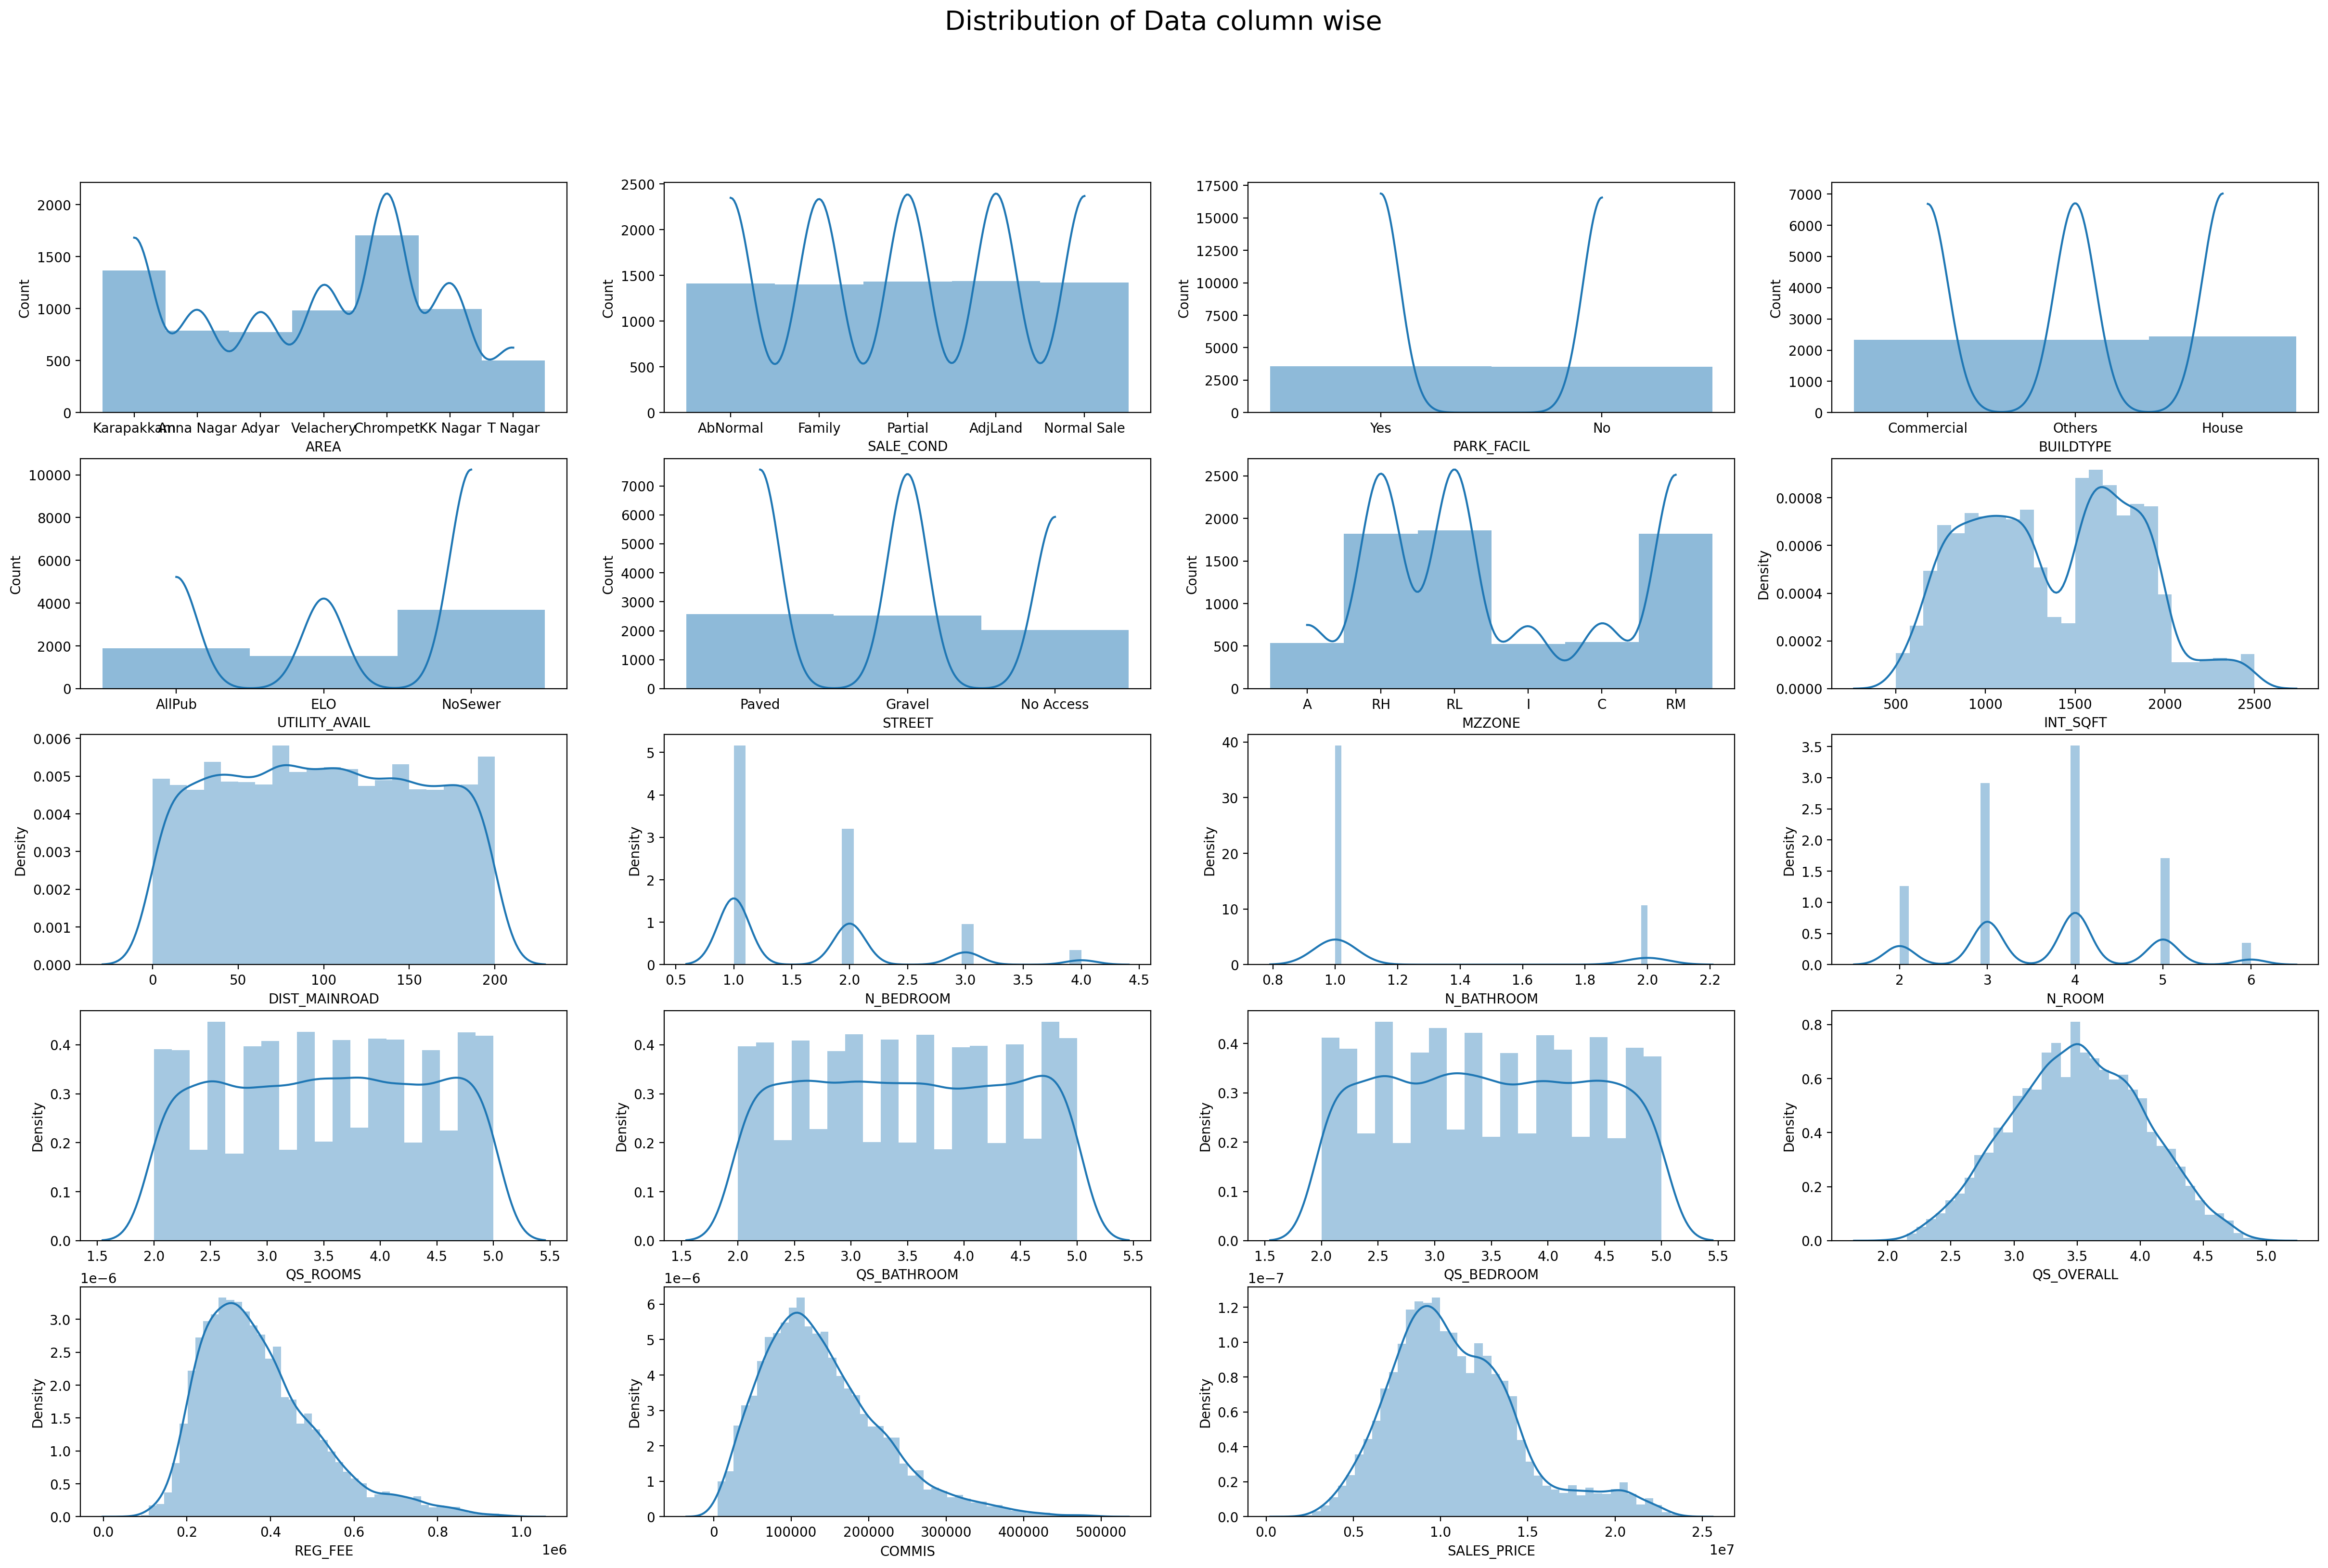

In [26]:
import seaborn as sns

plt.figure(figsize=(30, 18), dpi=200)

plt.subplot(5,4,1)
sns.histplot(df.AREA, linewidth=0,kde=True)

plt.subplot(5,4,2)
sns.histplot(df.SALE_COND, linewidth=0,kde=True)

plt.subplot(5,4,3)
sns.histplot(df.PARK_FACIL, linewidth=0,kde=True)

plt.subplot(5,4,4)
sns.histplot(df.BUILDTYPE, linewidth=0,kde=True)

plt.subplot(5,4,5)
sns.histplot(df.UTILITY_AVAIL  , linewidth=0,kde=True)

plt.subplot(5,4,6)
sns.histplot(df.STREET , linewidth=0,kde=True)

plt.subplot(5,4,7)
sns.histplot(df.MZZONE  , linewidth=0,kde=True)


plt.subplot(5,4,8)
sns.distplot(df.INT_SQFT )

plt.subplot(5,4,9)
sns.distplot(df.DIST_MAINROAD )

plt.subplot(5,4,10)
sns.distplot(df.N_BEDROOM)

plt.subplot(5,4,11)
sns.distplot(df.N_BATHROOM )

plt.subplot(5,4,12)
sns.distplot(df.N_ROOM)

plt.subplot(5,4,13)
sns.distplot(df.QS_ROOMS)

plt.subplot(5,4,14)
sns.distplot(df.QS_BATHROOM)

plt.subplot(5,4,15)
sns.distplot(df.QS_BEDROOM)

plt.subplot(5,4,16)
sns.distplot(df.QS_OVERALL)

plt.subplot(5,4,17)
sns.distplot(df.REG_FEE)

plt.subplot(5,4,18)
sns.distplot(df.COMMIS)

plt.subplot(5,4,19)
sns.distplot(df.SALES_PRICE )

plt.suptitle("Distribution of Data column wise", fontsize=20)
plt.show()

In [10]:
## Indpendent and dependent features
from sklearn.model_selection import train_test_split
X = df.drop(['SALES_PRICE','PRT_ID','DATE_SALE','DATE_BUILD'], axis=1)
y = df['SALES_PRICE']

In [11]:

# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
obj_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, obj_features),
        ("StandardScaler", numeric_transformer, num_features)
        
    ],remainder='passthrough'
    
)

In [12]:
for i in obj_features:
    print(f"Value counts for {i}:\n{df[i].value_counts()}\n")

Value counts for AREA:
AREA
Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: count, dtype: int64

Value counts for SALE_COND:
SALE_COND
AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: count, dtype: int64

Value counts for PARK_FACIL:
PARK_FACIL
Yes    3587
No     3522
Name: count, dtype: int64

Value counts for BUILDTYPE:
BUILDTYPE
House         2444
Others        2336
Commercial    2329
Name: count, dtype: int64

Value counts for UTILITY_AVAIL:
UTILITY_AVAIL
NoSewer    3700
AllPub     1887
ELO        1522
Name: count, dtype: int64

Value counts for STREET:
STREET
Paved        2572
Gravel       2520
No Access    2017
Name: count, dtype: int64

Value counts for MZZONE:
MZZONE
RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: count, dtype: int64



In [13]:
# Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [16]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [17]:
## Beginning Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor":AdaBoostRegressor()
   
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 710984.6922
- Mean Absolute Error: 535894.6610
- R2 Score: 0.9651
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 702094.3835
- Mean Absolute Error: 526002.7946
- R2 Score: 0.9625


Lasso
Model performance for Training set
- Root Mean Squared Error: 710984.6929
- Mean Absolute Error: 535893.6014
- R2 Score: 0.9651
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 702093.0533
- Mean Absolute Error: 526000.9695
- R2 Score: 0.9625


Ridge
Model performance for Training set
- Root Mean Squared Error: 711034.8932
- Mean Absolute Error: 535726.7965
- R2 Score: 0.9650
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 702052.2138
- Mean Absolute Error: 525564.3156
- R2 Score: 0.9625


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 1073473.8141
- Mean

Seeing the results, Random Forest is chosen as it has high train and test accuracy and it's error is less compared to others.

In [18]:
final_model=RandomForestRegressor()
final_model.fit(X_train,y_train)

RandomForestRegressor()

In [19]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(final_model, file)


In [20]:
with open("preprocessor.pkl", "wb") as f:
    pickle.dump(preprocessor, f)


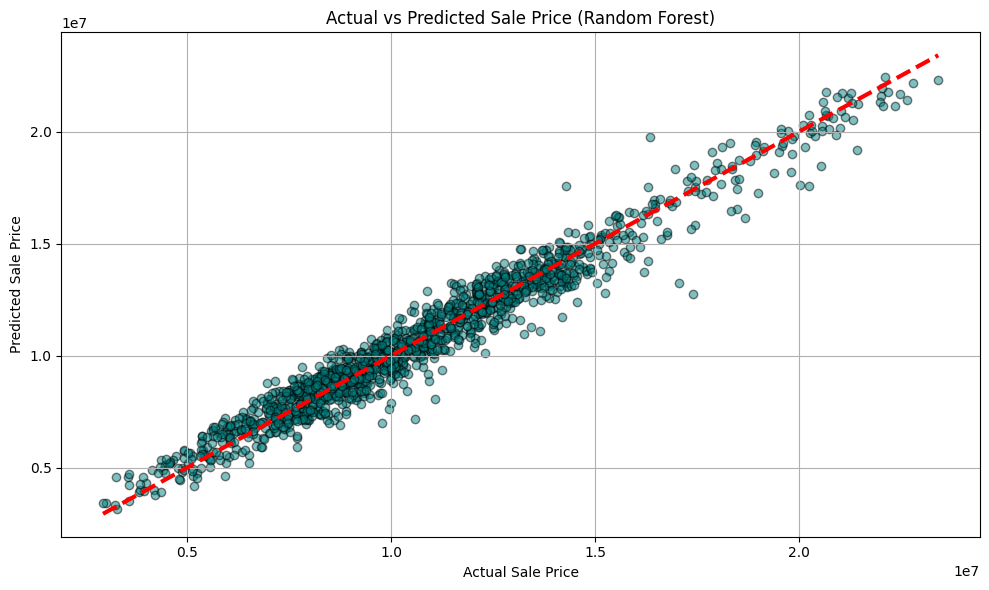

In [28]:
# Predict using final model
y_pred = final_model.predict(X_test)

# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal', edgecolors='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Price (Random Forest)")
plt.grid(True)
plt.tight_layout()
plt.show()


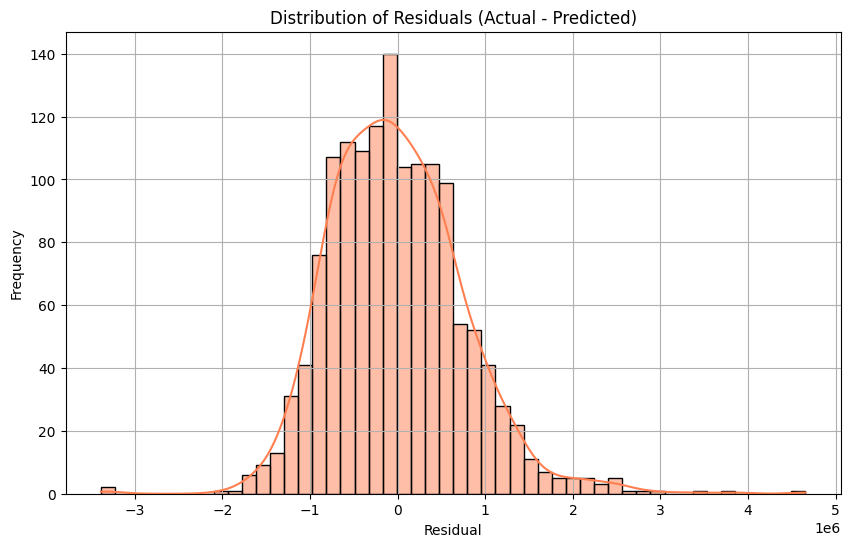

In [29]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True, color='coral')
plt.title("Distribution of Residuals (Actual - Predicted)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
